In [37]:
import os
import time

from PIL import Image
import numpy as np
from matplotlib import pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
os.chdir("/content/drive/My Drive/digits")
files=os.listdir(".")
print(files)

['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


In [17]:
images=[]
labels=[]
for subdir in files:
  os.chdir("/content/drive/My Drive/digits/{0}".format(subdir))
  temp=os.listdir(".")
  for i in temp:
    images.append(np.array(Image.open(i)).astype('float32'))
    labels.append(subdir)
print(len(images))
print(len(labels))

1409
1409


In [21]:
print(images[27])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 5. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
images=np.array(images)
labels=np.array(labels)
print(images.shape)
print(labels.shape)

(1409, 32, 32)
(1409,)


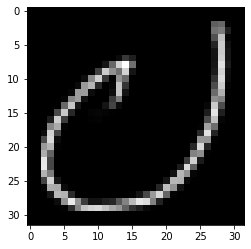

In [23]:
plt.imshow(images[27],cmap='gray')

In [ ]:
# for i in range(images.shape[0]):
#   images[i]=images[i]/255.0
# print(images[2][-5])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.14509805 0.6392157
 0.972549   0.94509804 0.50980395 0.05490196 0.627451   0.9137255
 0.         0.        ]


In [26]:
LE=preprocessing.LabelEncoder()
LE.fit(labels)
labelsEnc=LE.transform(labels)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(images,labelsEnc,train_size=0.80,shuffle=True)
print("Training set examples: ",X_train.shape[0] )
print("Testing set examples: ",X_test.shape[0] )

Training set examples:  1127
Testing set examples:  282


In [42]:
model= tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(input_shape=(32,32)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')]
)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy'],
)

In [43]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                32800     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                330       
Total params: 33,130
Trainable params: 33,130
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
36/36 [==============================] - 0s 5ms/step - loss: 36.4190 - accuracy: 0.6477 - val_loss: 1.4298 - val_accuracy: 0.6667
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 1.2970 - accuracy: 0.6176 - val_loss: 1.0581 - val_accuracy: 0.5922
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 0.9630 - accuracy: 0.6619 - val_loss: 0.8867 - val_accuracy: 0.6631
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.8445 - accuracy: 0.6859 - val_loss: 0.9225 - val_accuracy: 0.6596
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.7895 - accuracy: 0.6965 - val_loss: 0.8369 - val_accuracy: 0.6702
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.7376 - accuracy: 0.7329 - val_loss: 0.9046 - val_accuracy: 0.7092
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.7210 - accuracy: 0.7498 - val_loss: 0.7692 - val_accuracy: 0.7234
Epoch 8/100


In [45]:
trainLoss,trainAcc=model.evaluate(X_train,y_train,verbose=0)
testLoss,testAcc=model.evaluate(X_test,y_test,verbose=0)
print("Training accuracy:", trainAcc)
print("Training Loss: ",trainLoss)
print("Testing Accuracy:" ,testAcc)
print("Testing loss: ",testLoss)

Training accuracy: 0.8092280626296997
Training Loss:  0.4541401267051697
Testing Accuracy: 0.7801418304443359
Testing loss:  0.5965157747268677


In [46]:
nodes=[10,16,32,64,128,256,512,1024]
times=[]
trainAcc=[]
testAcc=[]
for i in nodes:
  print("Nodes: ",i)
  model= tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(input_shape=(32,32)),
     tf.keras.layers.Dense(i,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')]
  )
  model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy'],
  )
  init=time.time()
  model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test))
  times.append(time.time()-init)
  loss,Acc=model.evaluate(X_train,y_train,verbose=0)
  trainAcc.append(Acc)
  loss,Acc=model.evaluate(X_test,y_test,verbose=0)
  testAcc.append(Acc)

Nodes:  10
Epoch 1/100
36/36 [==============================] - 0s 5ms/step - loss: 14.0166 - accuracy: 0.4179 - val_loss: 2.1374 - val_accuracy: 0.4752
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 2.0669 - accuracy: 0.4720 - val_loss: 2.0032 - val_accuracy: 0.4752
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 1.9550 - accuracy: 0.4720 - val_loss: 1.9154 - val_accuracy: 0.4752
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 1.8897 - accuracy: 0.4720 - val_loss: 1.8766 - val_accuracy: 0.4752
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 1.8603 - accuracy: 0.4720 - val_loss: 1.8560 - val_accuracy: 0.4752
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 1.8485 - accuracy: 0.4720 - val_loss: 1.8503 - val_accuracy: 0.4752
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 1.8446 - accuracy: 0.4720 - val_loss: 1.8486 - val_accuracy: 0.4752
E

Training Times


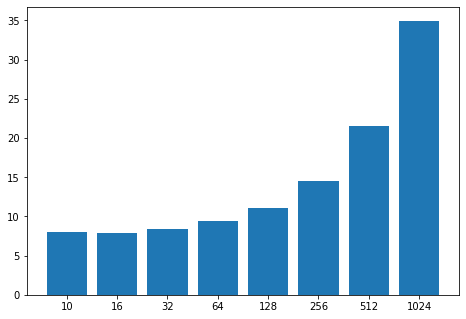

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
nodes = ['10', '16', '32', '64', '128','256','512','1024']
ax.bar(nodes,times)
print("Training Times")
plt.show()

Train and test loss: 


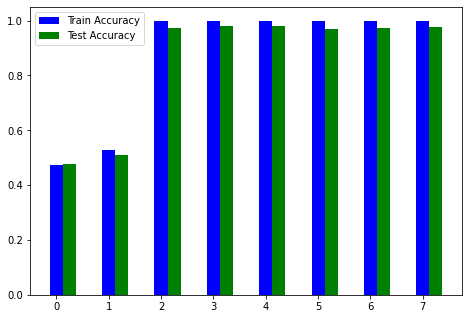

In [48]:
print("Train and test loss: ")
data = [trainAcc,testAcc]
X = np.arange(len(nodes))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Train Accuracy','Test Accuracy'])
plt.show()

## So by looking at the graph we can say that for nodes 32 onwards the training and testing accuracy improves significantly as compared to when nodes are 10 or 16. 

In [49]:
layers=[2,3,4,5]
times=[]
trainAcc=[]
testAcc=[]
for i in range(len(layers)):
  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(32,32)))
  for j in range(layers[i]-1):
    model.add(tf.keras.layers.Dense(32,activation='relu'))
  model.add(tf.keras.layers.Dense(10,activation='softmax'))
  model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy'],
  )
  init=time.time()
  model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test))
  times.append(time.time()-init)
  loss,Acc=model.evaluate(X_train,y_train,verbose=0)
  trainAcc.append(Acc)
  loss,Acc=model.evaluate(X_test,y_test,verbose=0)
  testAcc.append(Acc)

Epoch 1/100
36/36 [==============================] - 0s 5ms/step - loss: 38.9636 - accuracy: 0.5626 - val_loss: 1.3999 - val_accuracy: 0.5426
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 1.2821 - accuracy: 0.5501 - val_loss: 1.2403 - val_accuracy: 0.5248
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 1.1439 - accuracy: 0.5626 - val_loss: 1.2321 - val_accuracy: 0.5496
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 1.0878 - accuracy: 0.5821 - val_loss: 1.1746 - val_accuracy: 0.5461
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 1.0928 - accuracy: 0.5759 - val_loss: 1.1706 - val_accuracy: 0.5319
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 1.0806 - accuracy: 0.5714 - val_loss: 1.1873 - val_accuracy: 0.5355
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 1.0770 - accuracy: 0.5697 - val_loss: 1.2369 - val_accuracy: 0.5461
Epoch 8/100


Training Times


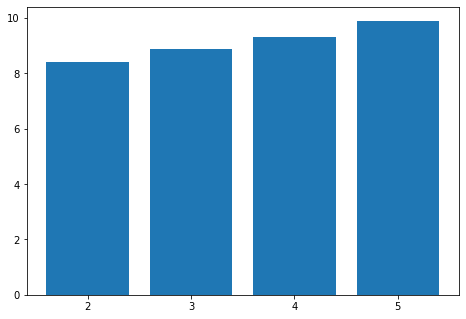

In [50]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
layers = ['2','3','4','5']
ax.bar(layers,times)
print("Training Times")
plt.show()

Train and test loss: 


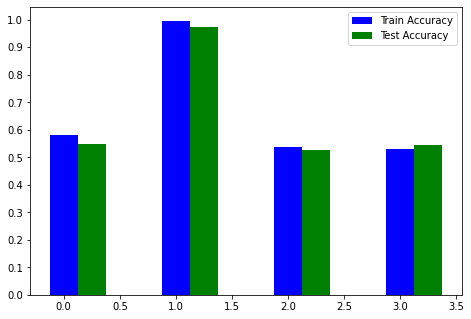

In [52]:
print("Train and test loss: ")
data = [trainAcc,testAcc]
X = np.arange(len(layers))
fig = plt.figure()
ind=np.arange(4)
ax = fig.add_axes([0,0,1,1])
layers = ['2','3','4','5']
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.legend(labels=['Train Accuracy','Test Accuracy'])
plt.show()

# So maximum accuracy is obtained for 32 nodes when number of layers are 3